<a href="https://colab.research.google.com/github/sellaakhilaa/Feature-enginering/blob/main/importance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Feature  Importance
2       age    0.281662
1       sex    0.252257
5      fare    0.246379
0    pclass    0.101578
3     sibsp    0.047823
4     parch    0.042208
6  embarked    0.028093


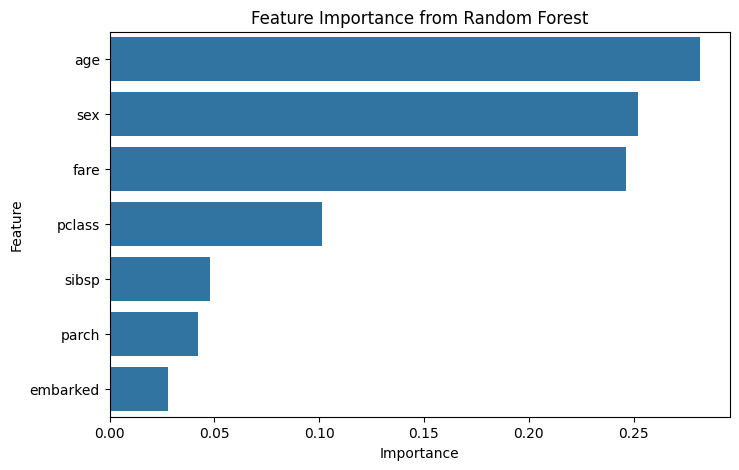

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select useful features
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Drop missing values
df = df.dropna()

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])        # male=1, female=0
df['embarked'] = le_embarked.fit_transform(df['embarked'])

# Split data
X = df.drop('survived', axis=1)
y = df['survived']
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()
